In [4]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from config import data_processed_dir
from os.path import join
import folium

In [5]:
porto_traffic = pd.read_csv(join(data_processed_dir, 'traffic_flow_clean.csv'))

In [6]:
porto_traffic.columns

Index(['dateFrom', 'dateTo', 'processed_id', 'longitude', 'latitude',
       'intensity', 'ocupancy'],
      dtype='object')

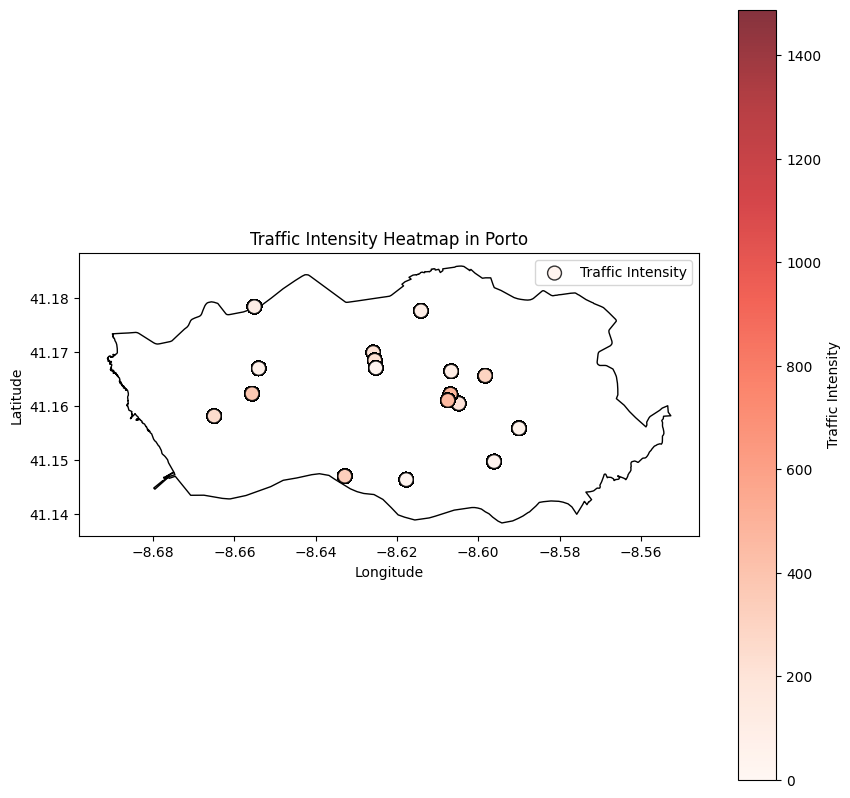

In [7]:

# Get the city of Porto boundary from OpenStreetMap
place_name = "Porto, Portugal"
porto = ox.geocode_to_gdf(place_name)

# Plot the city boundary
fig, ax = plt.subplots(figsize=(10, 10))
porto.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot the heatmap for traffic intensity
sc = ax.scatter(
    porto_traffic['longitude'],
    porto_traffic['latitude'],
    c=porto_traffic['intensity'],
    cmap='Reds',
    s=100,  # Adjust the size of the points
    edgecolor='black',
    alpha=0.8,  # Adjust the transparency
    label='Traffic Intensity'
)

# Add a colorbar
plt.colorbar(sc, label='Traffic Intensity')

# Show the plot
plt.title('Traffic Intensity Heatmap in Porto')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

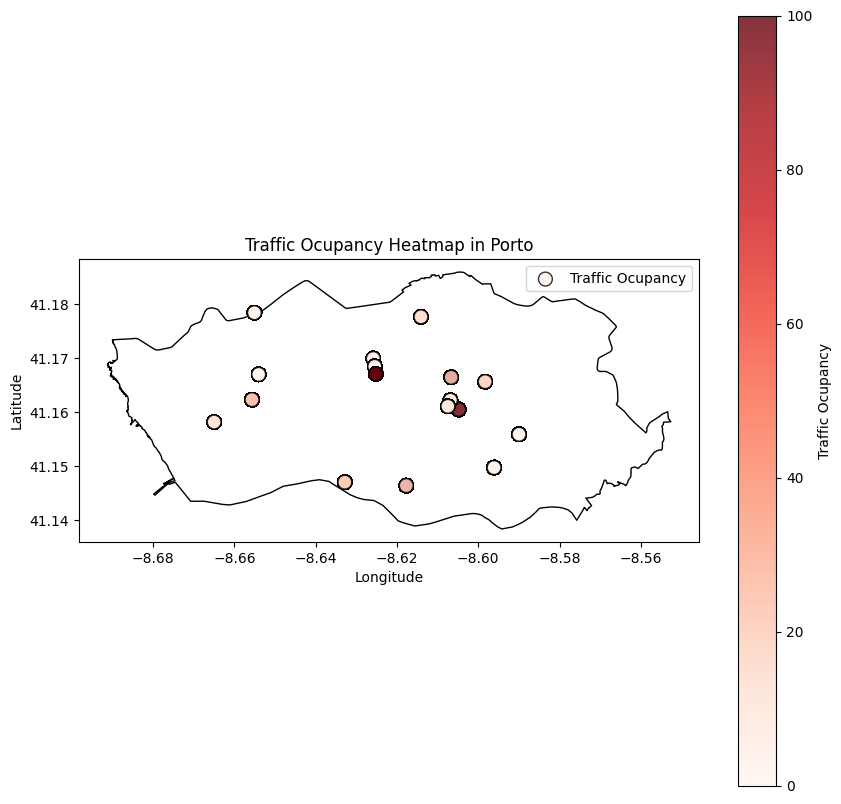

In [9]:

# Get the city of Porto boundary from OpenStreetMap
place_name = "Porto, Portugal"
porto = ox.geocode_to_gdf(place_name)

# Plot the city boundary
fig, ax = plt.subplots(figsize=(10, 10))
porto.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot the heatmap for traffic intensity
sc = ax.scatter(
    porto_traffic['longitude'],
    porto_traffic['latitude'],
    c=porto_traffic['ocupancy'],
    cmap='Reds',
    s=100,  # Adjust the size of the points
    edgecolor='black',
    alpha=0.8,  # Adjust the transparency
    label='Traffic Ocupancy'
)

# Add a colorbar
plt.colorbar(sc, label='Traffic Ocupancy')

# Show the plot
plt.title('Traffic Ocupancy Heatmap in Porto')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [7]:
# Create a base map centered at Porto
porto_map = folium.Map(location=[41.1579, -8.6291], zoom_start=13)  # Coordinates for Porto city center

# Add the road network of Porto
place_name = "Porto, Portugal"
graph = ox.graph_from_place(place_name, network_type='all')
gdf = ox.graph_to_gdfs(graph, nodes=False, edges=True)
gjson = gdf.to_json()
folium.GeoJson(gjson).add_to(porto_map)

# Add heatmap based on traffic intensity
for i, row in porto_traffic.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        fill=True,
        fill_opacity=0.6,
        color='red',
        fill_color='red',
        popup=f'Traffic Intensity: {row["intensity"]}',
    ).add_to(porto_map)

# Save the map to an HTML file
porto_map.save('porto_traffic_heatmap.html')